the python version is 3.7.10


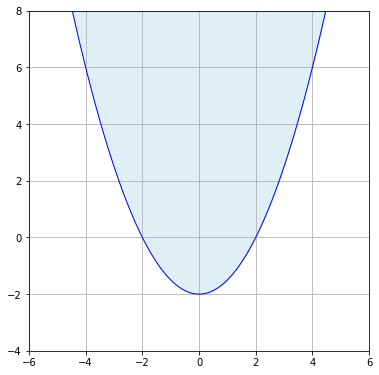

In [4]:
# 繪製的思路是從拋物線上採樣 1000 個點，這 1000 個點連成的函數圖像就平滑了許多。
# 拋物線圖形的對稱軸為 x=-b/2a
# 若 a>0，則f(x)= ax*x + bx + c
#        在 x=-b/2a 時f(x)有最小值，
#        圖形最低點為 (-b/2a, (4*a*c-b*b)/4a)
#
# 若 a<0，則f(x)= ax*x + bx + c
#        在 x=-b/2a 時f(x)有最大值，
#        圖形最高點為 (-b/2a, (4*a*c-b*b)/4a)
#
# 茄萣國中 Python社團
# 作業四A: 繪製拋物線 draw-parabola
# 姓名 : 
# date : 110-09-14
# 判別式 Q = b*b - 4*a*c
# 公式 x1=(-b+math.sqrt(Q))/(2*a)    # math.sqrt(x)開平方根
# 公式 x2=(-b-math.sqrt(Q))/(2*a)
#
# python 3.8.10
# run on replit.com
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is',python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(12, 12)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-4, 8)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-6,-4,-2,0,2,4,6]
yvalues = [-4,-2,0,2,4,6,8]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=10)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
plt.savefig("./png/para_curve_0.png",format="png",dpi=150)
#
def set_xy(a, b, c, x_start, x_end, num_points) :
    XS = np.linspace(x_start, x_end, num_points)
    YS = [a*ix*ix + b*ix + c for ix in XS]
    return XS, YS
# end def
#
# let a,b,c =
# 4,0,-2
# 2,0,-2
# 1,0,-2
# 0.5,0,-2
#
xs, ys = set_xy(0.5,0,-2,-5,5,1000)
ax.plot(xs, ys, color='blue', alpha=1.0, linewidth=1.0, solid_capstyle='round', zorder=10)
plt.savefig("./png/para_curve_1.png",format="png",dpi=150)
#
plt.fill_between(xs, ys, plt.ylim()[1], color="lightblue", alpha=0.4)
plt.savefig("./png/para_curve_2.png",format="png",dpi=150)
#
